In [50]:
import glob, os
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack
import matplotlib as mpl
from astropy import units as u
import speclite.filters
import time
import sncosmo

In [51]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 20
plt.rcParams['savefig.dpi'] = 200
plt.rc('font', family='serif')

In [52]:
def calc_colors(pobstbl, bd0, bd1, bd2):
	gr = (pobstbl[f'magobs_{bd0}']-pobstbl[f'magobs_{bd1}']).item()
	grerr = np.sqrt(
		(pobstbl[f'magerr_{bd0}']**2)+(pobstbl[f'magerr_{bd1}']**2)
	).item()
	ri = (pobstbl[f'magobs_{bd1}']-pobstbl[f'magobs_{bd2}']).item()
	rierr = np.sqrt(
		(pobstbl[f'magerr_{bd1}']**2)+(pobstbl[f'magerr_{bd2}']**2)
	).item()
	return gr, grerr, ri, rierr

- Other comparison models

# Med-bands

In [53]:
tag = 'med'
bd0 = 'm475'
bd1 = 'm625'
bd2 = 'm750'

d = 40
obsphtlist = sorted(glob.glob(f"../5.result/kn_sim_cube_obs/med_iter100_{d}Mpc/Run*{tag}.ecsv"))
cmpphtlist = sorted(glob.glob(f'../3.table/sn_sim_sncosmo_synphot/*_{tag}.ecsv'))

print(f'KN obs. data    : {len(obsphtlist)}')
print(f'Other sim. data : {len(cmpphtlist)}')

In [55]:
ii = -8
jj = -1

obspht = obsphtlist[ii]
cmppht = cmpphtlist[jj]

print(f"[{ii}] Input obs   : {os.path.basename(obspht)}")
print(f"[{jj}] Comp. Model : {os.path.basename(cmppht)}")

#	Read tables
obstbl = ascii.read(obspht)
cmptbl = ascii.read(cmppht)

[-8] Input obs   : Run_TS_dyn_all_lanth_wind2_all_md0.1_vd0.3_mw0.1_vw0.15_angle90_synphot_med_obs_d40_iter100.med.ecsv
[-1] Comp. Model : v19-2009ip-corr_v1.0_type_IIn_sn_z1.0_synphot_med.ecsv


In [56]:
knphtlist = sorted(glob.glob('../3.table/kn_sim_cube_synphot/*_med.ecsv'))
cmpphtlist = sorted(glob.glob('../3.table/sn_sim_sncosmo_synphot/*_med.ecsv'))+sorted(glob.glob('../3.table/asteroid_sim_smass_synphot/*_med.ecsv'))
cmpphtlist[-10:]

['../3.table/sn_sim_sncosmo_synphot/v19-2007pk-corr_v1.0_type_IIn_sn_z0.01_synphot_med.ecsv',
 '../3.table/sn_sim_sncosmo_synphot/v19-2007pk-corr_v1.0_type_IIn_sn_z0.1_synphot_med.ecsv',
 '../3.table/sn_sim_sncosmo_synphot/v19-2007pk-corr_v1.0_type_IIn_sn_z1.0_synphot_med.ecsv',
 '../3.table/sn_sim_sncosmo_synphot/v19-2009ip-corr_v1.0_type_IIn_sn_z0.0001_synphot_med.ecsv',
 '../3.table/sn_sim_sncosmo_synphot/v19-2009ip-corr_v1.0_type_IIn_sn_z0.001_synphot_med.ecsv',
 '../3.table/sn_sim_sncosmo_synphot/v19-2009ip-corr_v1.0_type_IIn_sn_z0.01_synphot_med.ecsv',
 '../3.table/sn_sim_sncosmo_synphot/v19-2009ip-corr_v1.0_type_IIn_sn_z0.1_synphot_med.ecsv',
 '../3.table/sn_sim_sncosmo_synphot/v19-2009ip-corr_v1.0_type_IIn_sn_z1.0_synphot_med.ecsv',
 '../3.table/asteroid_sim_smass_synphot/smass_10hygiea_c-type_asteroid_synphot_med.ecsv',
 '../3.table/asteroid_sim_smass_synphot/smass_433eros_s-type_asteroid_synphot_med.ecsv']

In [57]:
if not os.path.exists(f"../3.table/comparison.models.color.{tag}.ecsv"):
	tablelist = []

	#	Comparison
	for nn, cmppht in enumerate(cmpphtlist):
		cmptbl = ascii.read(cmppht)
		times_sim = np.unique(cmptbl['t'])

		_ = Table()
		_['model name'] = [cmppht]*len(times_sim)
		_['t'] = times_sim
		try:
			_['z'] = cmptbl.meta['z']
		except:
			_['z'] = 0
		grmed_cmp = cmptbl[bd0]-cmptbl[bd1]
		rimed_cmp = cmptbl[bd1]-cmptbl[bd2]

		_[f'{bd0}-{bd1}'] = grmed_cmp
		_[f'{bd1}-{bd2}'] = rimed_cmp

		tablelist.append(_)

	cmpclrtbl = vstack(tablelist)
	cmpclrtbl.write(f"../3.table/comparison.models.color.{tag}.ecsv", format='ascii.ecsv', overwrite=True)
	cmpclrtbl

- Kilonova models

In [58]:
if not os.path.exists(f"../3.table/kn.sim_cube.color.{tag}.ecsv"):
	tablelist = []

	#	Comparison
	for nn, knpht in enumerate(knphtlist):
		print(f"[{nn+1}/{len(knphtlist)}] {os.path.basename(knpht)}", end='\r')

		kntbl = ascii.read(knpht)
		times_sim = np.unique(kntbl['t'])

		_ = Table()
		_['model name'] = [knpht]*len(times_sim)
		_['t'] = times_sim
		_['z'] = 0.0
		grmed_cmp = kntbl[bd0]-kntbl[bd1]
		rimed_cmp = kntbl[bd1]-kntbl[bd2]

		_[f'{bd0}-{bd1}'] = grmed_cmp
		_[f'{bd1}-{bd2}'] = rimed_cmp

		tablelist.append(_)

	knclrtbl = vstack(tablelist)
	knclrtbl.write(f"../3.table/kn.sim_cube.color.{tag}.ecsv", format='ascii.ecsv', overwrite=True)
	knclrtbl[:5]

In [59]:
times = np.unique(obstbl['t'])
indx_time = np.array([0, 8, 16, 24, 29, 32])
ntimes = times[indx_time]
print(f"Times : {list(times[indx_time])} days")

Times : [0.125, 0.25, 0.5, 1.0, 1.542, 2.0] days


m475-m625 : -0.076 +/- 0.251
m625-m750 : 0.377 +/- 0.329
m475-m625 : -0.116 +/- 0.196
m625-m750 : 0.449 +/- 0.251
m475-m625 : -0.082 +/- 0.190
m625-m750 : 0.171 +/- 0.236
m475-m625 : 0.067 +/- 0.194
m625-m750 : 0.064 +/- 0.258
m475-m625 : 1.198 +/- 0.209
m625-m750 : 0.112 +/- 0.208
m475-m625 : 1.001 +/- 0.309
m625-m750 : 0.602 +/- 0.255


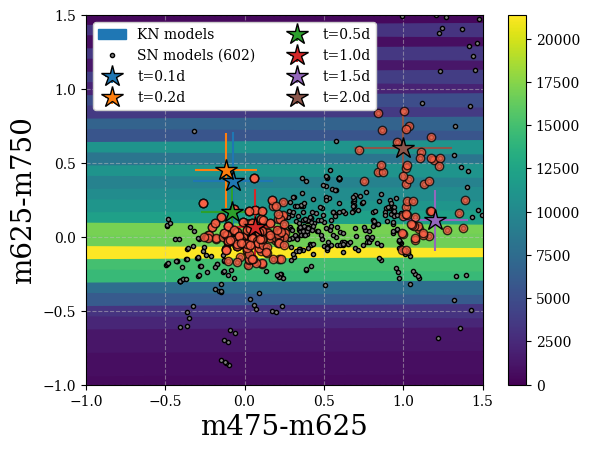

In [62]:
plt.hexbin(knclrtbl[f"{bd0}-{bd1}"], knclrtbl[f"{bd1}-{bd2}"], gridsize=70, label=f'KN models')
cbar = plt.colorbar()
plt.plot(cmpclrtbl[f"{bd0}-{bd1}"], cmpclrtbl[f"{bd1}-{bd2}"], ls='none', marker='.', c='grey', mec='k', alpha=1.0, label=f'SN models ({len(cmpclrtbl)})')
# plt.plot(cmpclrtbl[f"{bd0}-{bd1}"][indx_clr], cmpclrtbl[f"{bd1}-{bd2}"][indx_clr], ls='none', marker='o', c='tomato', mec='k', alpha=0.75, label=f'Color cut ({len(cmpclrtbl[indx_clr])})')

for t in ntimes:
	pobstbl = obstbl[
		(obstbl['seed']==0) &
		(obstbl['t']==t)
	]
	gr, grerr, ri, rierr = calc_colors(pobstbl, bd0, bd1, bd2)

	print(f"{bd0}-{bd1} : {gr:1.3f} +/- {grerr:1.3f}")
	print(f"{bd1}-{bd2} : {ri:1.3f} +/- {rierr:1.3f}")

	#	Color tolerence
	colortol = 0.25
	indx_clr = np.where(
		# (cmpclrtbl[f"{bd0}-{bd1}"]>gr-colortol) &
		# (cmpclrtbl[f"{bd0}-{bd1}"]<gr+colortol) &
		# (cmpclrtbl[f"{bd1}-{bd2}"]>ri-colortol) &
		# (cmpclrtbl[f"{bd1}-{bd2}"]<ri+colortol)
		(cmpclrtbl[f"{bd0}-{bd1}"]>gr-grerr) &
		(cmpclrtbl[f"{bd0}-{bd1}"]<gr+grerr) &
		(cmpclrtbl[f"{bd1}-{bd2}"]>ri-rierr) &
		(cmpclrtbl[f"{bd1}-{bd2}"]<ri+rierr)
	)
	plt.errorbar(gr, ri, xerr=grerr, yerr=rierr, marker='*', mec='k', ms=16, ls='none', label=f't={t:1.1f}d')
	plt.plot(cmpclrtbl[f"{bd0}-{bd1}"][indx_clr], cmpclrtbl[f"{bd1}-{bd2}"][indx_clr], ls='none', marker='o', c='tomato', mec='k', alpha=0.75,)


plt.legend(loc='upper left', ncol=2, framealpha=1.0)
plt.xlim([-1, 1.5])
plt.ylim([-1, 1.5])
plt.xlabel(f'{bd0}-{bd1}')
plt.ylabel(f'{bd1}-{bd2}')
plt.grid('both', ls='--', c='silver', alpha=0.5)

plt.savefig(f'../4.plot/color.example.{tag}.png')

# SDSS filter (gri)

In [73]:
tag = 'sdss'
bd0 = 'g'
bd1 = 'r'
bd2 = 'i'

d = 40
obsphtlist = sorted(glob.glob(f"../5.result/kn_sim_cube_obs/{tag}_{d}Mpc/Run*{tag}.ecsv"))
cmpphtlist = sorted(glob.glob(f'../3.table/sn_sim_sncosmo_synphot/*_lsst.ecsv'))+sorted(glob.glob(f'../3.table/asteroid_sim_smass_synphot/*{tag}.ecsv'))
knphtlist = sorted(glob.glob(f'../3.table/kn_sim_cube_synphot/*_{tag}.ecsv'))

print(f'KN obs. data    : {len(obsphtlist)}')
print(f'KN sim. data    : {len(knphtlist)}')
print(f'Other sim. data : {len(cmpphtlist)}')

KN obs. data    : 6300
KN sim. data    : 6300
Other sim. data : 53


In [71]:
ii = -8
jj = -1

obspht = obsphtlist[ii]
cmppht = cmpphtlist[jj]

print(f"[{ii}] Input obs   : {os.path.basename(obspht)}")
print(f"[{jj}] Comp. Model : {os.path.basename(cmppht)}")

#	Read tables
obstbl = ascii.read(obspht)
cmptbl = ascii.read(cmppht)

[-8] Input obs   : Run_TS_dyn_all_lanth_wind2_all_md0.1_vd0.3_mw0.1_vw0.15_angle90_synphot_sdss_obs_d40_iter100.sdss.ecsv
[-1] Comp. Model : smass_433eros_s-type_asteroid_synphot_sdss.ecsv


In [74]:
if not os.path.exists(f"../3.table/comparison.models.color.{tag}.ecsv"):
	tablelist = []

	#	Comparison
	for nn, cmppht in enumerate(cmpphtlist):
		cmptbl = ascii.read(cmppht)
		times_sim = np.unique(cmptbl['t'])

		_ = Table()
		_['model name'] = [cmppht]*len(times_sim)
		_['t'] = times_sim
		try:
			_['z'] = cmptbl.meta['z']
		except:
			_['z'] = 0
		grmed_cmp = cmptbl[bd0]-cmptbl[bd1]
		rimed_cmp = cmptbl[bd1]-cmptbl[bd2]

		_[f'{bd0}-{bd1}'] = grmed_cmp
		_[f'{bd1}-{bd2}'] = rimed_cmp

		tablelist.append(_)

	cmpclrtbl = vstack(tablelist)
	cmpclrtbl.write(f"../3.table/comparison.models.color.{tag}.ecsv", format='ascii.ecsv', overwrite=True)
	cmpclrtbl

In [75]:
if not os.path.exists(f"../3.table/kn.sim_cube.color.{tag}.ecsv"):
	tablelist = []

	#	Comparison
	for nn, knpht in enumerate(knphtlist):
		print(f"[{nn+1}/{len(knphtlist)}] {os.path.basename(knpht)}", end='\r')

		kntbl = ascii.read(knpht)
		times_sim = np.unique(kntbl['t'])

		_ = Table()
		_['model name'] = [knpht]*len(times_sim)
		_['t'] = times_sim
		_['z'] = 0.0
		grmed_cmp = kntbl[bd0]-kntbl[bd1]
		rimed_cmp = kntbl[bd1]-kntbl[bd2]

		_[f'{bd0}-{bd1}'] = grmed_cmp
		_[f'{bd1}-{bd2}'] = rimed_cmp

		tablelist.append(_)

	knclrtbl = vstack(tablelist)
	knclrtbl.write(f"../3.table/kn.sim_cube.color.{tag}.ecsv", format='ascii.ecsv', overwrite=True)
	knclrtbl[:5]

In [76]:
times = np.unique(obstbl['t'])
indx_time = np.array([0, 8, 16, 24, 29, 32])
ntimes = times[indx_time]
print(f"Times : {list(times[indx_time])} days")

Times : [0.125, 0.25, 0.5, 1.0, 1.542, 2.0] days


g-r : -0.063 +/- 0.165
r-i : -0.017 +/- 0.225
g-r : 0.132 +/- 0.124
r-i : 0.201 +/- 0.165
g-r : -0.511 +/- 0.120
r-i : 0.453 +/- 0.157
g-r : -0.141 +/- 0.125
r-i : 0.181 +/- 0.167
g-r : 0.773 +/- 0.131
r-i : 0.221 +/- 0.138
g-r : 1.038 +/- 0.187
r-i : 0.741 +/- 0.164


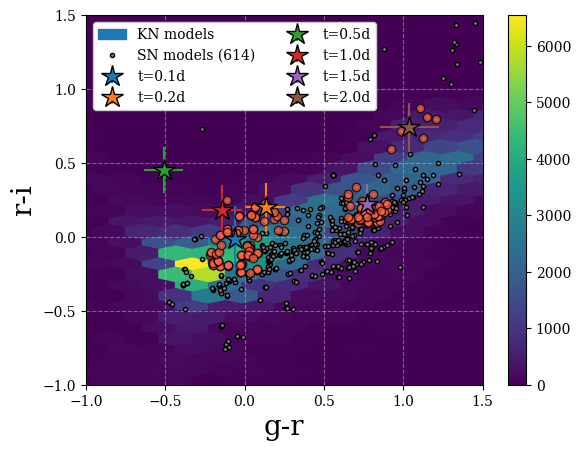

In [77]:
plt.hexbin(knclrtbl[f"{bd0}-{bd1}"], knclrtbl[f"{bd1}-{bd2}"], gridsize=70, label=f'KN models')
cbar = plt.colorbar()
plt.plot(cmpclrtbl[f"{bd0}-{bd1}"], cmpclrtbl[f"{bd1}-{bd2}"], ls='none', marker='.', c='grey', mec='k', alpha=1.0, label=f'SN models ({len(cmpclrtbl)})')
# plt.plot(cmpclrtbl[f"{bd0}-{bd1}"][indx_clr], cmpclrtbl[f"{bd1}-{bd2}"][indx_clr], ls='none', marker='o', c='tomato', mec='k', alpha=0.75, label=f'Color cut ({len(cmpclrtbl[indx_clr])})')

for t in ntimes:
	pobstbl = obstbl[
		(obstbl['seed']==0) &
		(obstbl['t']==t)
	]
	gr, grerr, ri, rierr = calc_colors(pobstbl, bd0, bd1, bd2)

	print(f"{bd0}-{bd1} : {gr:1.3f} +/- {grerr:1.3f}")
	print(f"{bd1}-{bd2} : {ri:1.3f} +/- {rierr:1.3f}")

	#	Color tolerence
	colortol = 0.25
	indx_clr = np.where(
		# (cmpclrtbl[f"{bd0}-{bd1}"]>gr-colortol) &
		# (cmpclrtbl[f"{bd0}-{bd1}"]<gr+colortol) &
		# (cmpclrtbl[f"{bd1}-{bd2}"]>ri-colortol) &
		# (cmpclrtbl[f"{bd1}-{bd2}"]<ri+colortol)
		(cmpclrtbl[f"{bd0}-{bd1}"]>gr-grerr) &
		(cmpclrtbl[f"{bd0}-{bd1}"]<gr+grerr) &
		(cmpclrtbl[f"{bd1}-{bd2}"]>ri-rierr) &
		(cmpclrtbl[f"{bd1}-{bd2}"]<ri+rierr)
	)
	plt.errorbar(gr, ri, xerr=grerr, yerr=rierr, marker='*', mec='k', ms=16, ls='none', label=f't={t:1.1f}d')
	plt.plot(cmpclrtbl[f"{bd0}-{bd1}"][indx_clr], cmpclrtbl[f"{bd1}-{bd2}"][indx_clr], ls='none', marker='o', c='tomato', mec='k', alpha=0.75,)


plt.legend(loc='upper left', ncol=2, framealpha=1.0)
plt.xlim([-1, 1.5])
plt.ylim([-1, 1.5])
plt.xlabel(f'{bd0}-{bd1}')
plt.ylabel(f'{bd1}-{bd2}')
plt.grid('both', ls='--', c='silver', alpha=0.5)

plt.savefig(f'../4.plot/color.example.{tag}.png')

# LSST

In [97]:
tag = 'lsst'
bd0 = 'g'
bd1 = 'r'
bd2 = 'i'

d = 40
obsphtlist = sorted(glob.glob(f"../5.result/kn_sim_cube_obs/lsst_30s_iter10_{d}Mpc/Run*.ecsv"))
cmpphtlist = sorted(glob.glob(f'../3.table/sn_sim_sncosmo_synphot/*_lsst.ecsv'))+sorted(glob.glob(f'../3.table/asteroid_sim_smass_synphot/*{tag}.ecsv'))
knphtlist = sorted(glob.glob(f'../3.table/kn_sim_cube_synphot/*_{tag}.ecsv'))

print(f'KN obs. data    : {len(obsphtlist)}')
print(f'KN sim. data    : {len(knphtlist)}')
print(f'Other sim. data : {len(cmpphtlist)}')

KN obs. data    : 6300
KN sim. data    : 6300
Other sim. data : 51


In [98]:
ii = -8
jj = -1

obspht = obsphtlist[ii]
cmppht = cmpphtlist[jj]

print(f"[{ii}] Input obs   : {os.path.basename(obspht)}")
print(f"[{jj}] Comp. Model : {os.path.basename(cmppht)}")

#	Read tables
obstbl = ascii.read(obspht)
cmptbl = ascii.read(cmppht)

[-8] Input obs   : Run_TS_dyn_all_lanth_wind2_all_md0.1_vd0.3_mw0.1_vw0.15_angle90_synphot_lsst_obs_d40_iter10.lsst.ecsv
[-1] Comp. Model : v19-2009ip-corr_v1.0_type_IIn_sn_z1.0_synphot_lsst.ecsv


In [99]:
if not os.path.exists(f"../3.table/comparison.models.color.{tag}.ecsv"):
	tablelist = []

	#	Comparison
	for nn, cmppht in enumerate(cmpphtlist):
		cmptbl = ascii.read(cmppht)
		times_sim = np.unique(cmptbl['t'])

		_ = Table()
		_['model name'] = [cmppht]*len(times_sim)
		_['t'] = times_sim
		try:
			_['z'] = cmptbl.meta['z']
		except:
			_['z'] = 0
		grmed_cmp = cmptbl[bd0]-cmptbl[bd1]
		rimed_cmp = cmptbl[bd1]-cmptbl[bd2]

		_[f'{bd0}-{bd1}'] = grmed_cmp
		_[f'{bd1}-{bd2}'] = rimed_cmp

		tablelist.append(_)

	cmpclrtbl = vstack(tablelist)
	cmpclrtbl.write(f"../3.table/comparison.models.color.{tag}.ecsv", format='ascii.ecsv', overwrite=True)
	cmpclrtbl

In [100]:
if not os.path.exists(f"../3.table/kn.sim_cube.color.{tag}.ecsv"):
	tablelist = []

	#	Comparison
	for nn, knpht in enumerate(knphtlist):
		print(f"[{nn+1}/{len(knphtlist)}] {os.path.basename(knpht)}", end='\r')

		kntbl = ascii.read(knpht)
		times_sim = np.unique(kntbl['t'])

		_ = Table()
		_['model name'] = [knpht]*len(times_sim)
		_['t'] = times_sim
		_['z'] = 0.0
		grmed_cmp = kntbl[bd0]-kntbl[bd1]
		rimed_cmp = kntbl[bd1]-kntbl[bd2]

		_[f'{bd0}-{bd1}'] = grmed_cmp
		_[f'{bd1}-{bd2}'] = rimed_cmp

		tablelist.append(_)

	knclrtbl = vstack(tablelist)
	knclrtbl.write(f"../3.table/kn.sim_cube.color.{tag}.ecsv", format='ascii.ecsv', overwrite=True)
	knclrtbl[:5]

In [101]:
times = np.unique(obstbl['t'])
indx_time = np.array([0, 8, 16, 24, 29, 32])
ntimes = times[indx_time]
print(f"Times : {list(times[indx_time])} days")

Times : [0.125, 0.25, 0.5, 1.0, 1.542, 2.0] days


g-r : -0.043 +/- 0.051
r-i : -0.018 +/- 0.063
g-r : -0.100 +/- 0.038
r-i : 0.215 +/- 0.046
g-r : -0.317 +/- 0.037
r-i : 0.364 +/- 0.043
g-r : -0.123 +/- 0.038
r-i : 0.118 +/- 0.046
g-r : 0.719 +/- 0.040
r-i : 0.336 +/- 0.038
g-r : 1.150 +/- 0.057
r-i : 0.722 +/- 0.046


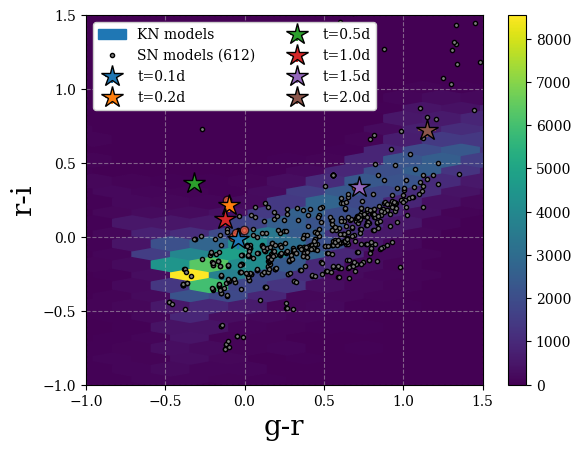

In [102]:
plt.hexbin(knclrtbl[f"{bd0}-{bd1}"], knclrtbl[f"{bd1}-{bd2}"], gridsize=70, label=f'KN models')
cbar = plt.colorbar()
plt.plot(cmpclrtbl[f"{bd0}-{bd1}"], cmpclrtbl[f"{bd1}-{bd2}"], ls='none', marker='.', c='grey', mec='k', alpha=1.0, label=f'SN models ({len(cmpclrtbl)})')
# plt.plot(cmpclrtbl[f"{bd0}-{bd1}"][indx_clr], cmpclrtbl[f"{bd1}-{bd2}"][indx_clr], ls='none', marker='o', c='tomato', mec='k', alpha=0.75, label=f'Color cut ({len(cmpclrtbl[indx_clr])})')

for t in ntimes:
	pobstbl = obstbl[
		(obstbl['seed']==0) &
		(obstbl['t']==t)
	]
	gr, grerr, ri, rierr = calc_colors(pobstbl, bd0, bd1, bd2)

	print(f"{bd0}-{bd1} : {gr:1.3f} +/- {grerr:1.3f}")
	print(f"{bd1}-{bd2} : {ri:1.3f} +/- {rierr:1.3f}")

	#	Color tolerence
	colortol = 0.25
	indx_clr = np.where(
		# (cmpclrtbl[f"{bd0}-{bd1}"]>gr-colortol) &
		# (cmpclrtbl[f"{bd0}-{bd1}"]<gr+colortol) &
		# (cmpclrtbl[f"{bd1}-{bd2}"]>ri-colortol) &
		# (cmpclrtbl[f"{bd1}-{bd2}"]<ri+colortol)
		(cmpclrtbl[f"{bd0}-{bd1}"]>gr-grerr) &
		(cmpclrtbl[f"{bd0}-{bd1}"]<gr+grerr) &
		(cmpclrtbl[f"{bd1}-{bd2}"]>ri-rierr) &
		(cmpclrtbl[f"{bd1}-{bd2}"]<ri+rierr)
	)
	plt.errorbar(gr, ri, xerr=grerr, yerr=rierr, marker='*', mec='k', ms=16, ls='none', label=f't={t:1.1f}d')
	plt.plot(cmpclrtbl[f"{bd0}-{bd1}"][indx_clr], cmpclrtbl[f"{bd1}-{bd2}"][indx_clr], ls='none', marker='o', c='tomato', mec='k', alpha=0.75,)


plt.legend(loc='upper left', ncol=2, framealpha=1.0)
plt.xlim([-1, 1.5])
plt.ylim([-1, 1.5])
plt.xlabel(f'{bd0}-{bd1}')
plt.ylabel(f'{bd1}-{bd2}')
plt.grid('both', ls='--', c='silver', alpha=0.5)

plt.savefig(f'../4.plot/color.example.{tag}.png')

# BVRI

In [90]:
tag = 'jc'
bd0 = 'V'
bd1 = 'R'
bd2 = 'I'

d = 40
obsphtlist = sorted(glob.glob(f"../5.result/kn_sim_cube_obs/kmtnet_120s_iter10_{d}Mpc/Run*.ecsv"))
cmpphtlist = sorted(glob.glob(f'../3.table/sn_sim_sncosmo_synphot/*_{tag}.ecsv'))+sorted(glob.glob(f'../3.table/asteroid_sim_smass_synphot/*{tag}.ecsv'))
knphtlist = sorted(glob.glob(f'../3.table/kn_sim_cube_synphot/*_{tag}.ecsv'))

print(f'KN obs. data    : {len(obsphtlist)}')
print(f'KN sim. data    : {len(knphtlist)}')
print(f'Other sim. data : {len(cmpphtlist)}')

KN obs. data    : 6300
KN sim. data    : 6300
Other sim. data : 52


In [91]:
ii = -8
jj = -1

obspht = obsphtlist[ii]
cmppht = cmpphtlist[jj]

print(f"[{ii}] Input obs   : {os.path.basename(obspht)}")
print(f"[{jj}] Comp. Model : {os.path.basename(cmppht)}")

#	Read tables
obstbl = ascii.read(obspht)
cmptbl = ascii.read(cmppht)

[-8] Input obs   : Run_TS_dyn_all_lanth_wind2_all_md0.1_vd0.3_mw0.1_vw0.15_angle90_synphot_jc_obs_d40_iter10.kmtnet.ecsv
[-1] Comp. Model : smass_433eros_s-type_asteroid_synphot_jc.ecsv


In [92]:
if not os.path.exists(f"../3.table/comparison.models.color.{tag}.ecsv"):
	tablelist = []

	#	Comparison
	for nn, cmppht in enumerate(cmpphtlist):
		cmptbl = ascii.read(cmppht)
		times_sim = np.unique(cmptbl['t'])

		_ = Table()
		_['model name'] = [cmppht]*len(times_sim)
		_['t'] = times_sim
		try:
			_['z'] = cmptbl.meta['z']
		except:
			_['z'] = 0
		grmed_cmp = cmptbl[bd0]-cmptbl[bd1]
		rimed_cmp = cmptbl[bd1]-cmptbl[bd2]

		_[f'{bd0}-{bd1}'] = grmed_cmp
		_[f'{bd1}-{bd2}'] = rimed_cmp

		tablelist.append(_)

	cmpclrtbl = vstack(tablelist)
	cmpclrtbl.write(f"../3.table/comparison.models.color.{tag}.ecsv", format='ascii.ecsv', overwrite=True)
	cmpclrtbl

In [93]:
if not os.path.exists(f"../3.table/kn.sim_cube.color.{tag}.ecsv"):
	tablelist = []

	#	Comparison
	for nn, knpht in enumerate(knphtlist):
		print(f"[{nn+1}/{len(knphtlist)}] {os.path.basename(knpht)}", end='\r')

		kntbl = ascii.read(knpht)
		times_sim = np.unique(kntbl['t'])

		_ = Table()
		_['model name'] = [knpht]*len(times_sim)
		_['t'] = times_sim
		_['z'] = 0.0
		grmed_cmp = kntbl[bd0]-kntbl[bd1]
		rimed_cmp = kntbl[bd1]-kntbl[bd2]

		_[f'{bd0}-{bd1}'] = grmed_cmp
		_[f'{bd1}-{bd2}'] = rimed_cmp

		tablelist.append(_)

	knclrtbl = vstack(tablelist)
	knclrtbl.write(f"../3.table/kn.sim_cube.color.{tag}.ecsv", format='ascii.ecsv', overwrite=True)
	knclrtbl[:5]

In [94]:
times = np.unique(obstbl['t'])
indx_time = np.array([0, 8, 16, 24, 29, 32])
ntimes = times[indx_time]
print(f"Times : {list(times[indx_time])} days")

Times : [0.125, 0.25, 0.5, 1.0, 1.542, 2.0] days


V-R : 0.071 +/- 0.196
R-I : 0.356 +/- 0.230
V-R : 0.066 +/- 0.147
R-I : -0.009 +/- 0.170
V-R : 0.184 +/- 0.147
R-I : 0.425 +/- 0.159
V-R : 0.106 +/- 0.150
R-I : 0.001 +/- 0.169
V-R : 0.513 +/- 0.137
R-I : 0.284 +/- 0.137
V-R : 0.683 +/- 0.183
R-I : 0.636 +/- 0.153


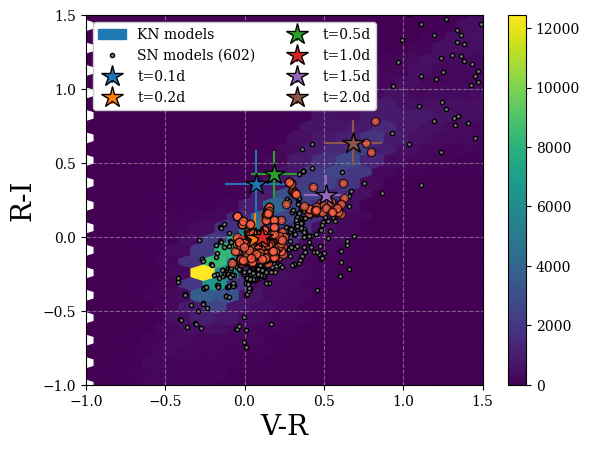

In [95]:
plt.hexbin(knclrtbl[f"{bd0}-{bd1}"], knclrtbl[f"{bd1}-{bd2}"], gridsize=70, label=f'KN models')
cbar = plt.colorbar()
plt.plot(cmpclrtbl[f"{bd0}-{bd1}"], cmpclrtbl[f"{bd1}-{bd2}"], ls='none', marker='.', c='grey', mec='k', alpha=1.0, label=f'SN models ({len(cmpclrtbl)})')
# plt.plot(cmpclrtbl[f"{bd0}-{bd1}"][indx_clr], cmpclrtbl[f"{bd1}-{bd2}"][indx_clr], ls='none', marker='o', c='tomato', mec='k', alpha=0.75, label=f'Color cut ({len(cmpclrtbl[indx_clr])})')

for t in ntimes:
	pobstbl = obstbl[
		(obstbl['seed']==0) &
		(obstbl['t']==t)
	]
	gr, grerr, ri, rierr = calc_colors(pobstbl, bd0, bd1, bd2)

	print(f"{bd0}-{bd1} : {gr:1.3f} +/- {grerr:1.3f}")
	print(f"{bd1}-{bd2} : {ri:1.3f} +/- {rierr:1.3f}")

	#	Color tolerence
	colortol = 0.25
	indx_clr = np.where(
		# (cmpclrtbl[f"{bd0}-{bd1}"]>gr-colortol) &
		# (cmpclrtbl[f"{bd0}-{bd1}"]<gr+colortol) &
		# (cmpclrtbl[f"{bd1}-{bd2}"]>ri-colortol) &
		# (cmpclrtbl[f"{bd1}-{bd2}"]<ri+colortol)
		(cmpclrtbl[f"{bd0}-{bd1}"]>gr-grerr) &
		(cmpclrtbl[f"{bd0}-{bd1}"]<gr+grerr) &
		(cmpclrtbl[f"{bd1}-{bd2}"]>ri-rierr) &
		(cmpclrtbl[f"{bd1}-{bd2}"]<ri+rierr)
	)
	plt.errorbar(gr, ri, xerr=grerr, yerr=rierr, marker='*', mec='k', ms=16, ls='none', label=f't={t:1.1f}d')
	plt.plot(cmpclrtbl[f"{bd0}-{bd1}"][indx_clr], cmpclrtbl[f"{bd1}-{bd2}"][indx_clr], ls='none', marker='o', c='tomato', mec='k', alpha=0.75,)


plt.legend(loc='upper left', ncol=2, framealpha=1.0)
plt.xlim([-1, 1.5])
plt.ylim([-1, 1.5])
plt.xlabel(f'{bd0}-{bd1}')
plt.ylabel(f'{bd1}-{bd2}')
plt.grid('both', ls='--', c='silver', alpha=0.5)

plt.savefig(f'../4.plot/color.example.{tag}.png')